In [ ]:
%%capture
!pip install -q pyannote.audio==1.1

In [ ]:
%%capture
!wget https://podcast.rasset.ie/podcasts/audio/2021/0626/20210626_rteraidion-bailiuchanbhairbre-bailichnbh_c21974765_21975131_232_.mp3

In [ ]:
%%capture
!ffmpeg -i /content/20210626_rteraidion-bailiuchanbhairbre-bailichnbh_c21974765_21975131_232_.mp3 -acodec pcm_s16le -ac 1 -ar 16000 /content/20210626_rteraidion-bailiuchanbhairbre-bailichnbh_c21974765_21975131_232_.wav

In [ ]:
import torch
pipeline = torch.hub.load('pyannote/pyannote-audio', 'dia')
diarization = pipeline({'audio': '/content/20210626_rteraidion-bailiuchanbhairbre-bailichnbh_c21974765_21975131_232_.wav'})

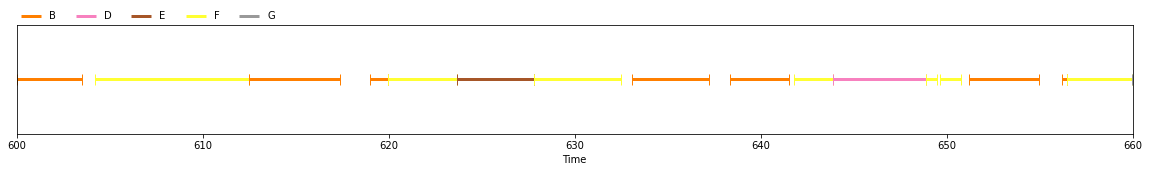

In [10]:
diarization

In [11]:
with open('/content/20210626_rteraidion-bailiuchanbhairbre-bailichnbh_c21974765_21975131_232_.rttm', 'w') as f:
    diarization.write_rttm(f)

In [ ]:
%%capture
!pip install youtube-dl

In [ ]:
%%capture
!youtube-dl f3wKxcP7hYE

In [ ]:
%%capture
!ffmpeg -i 'Sraith 2 Eip 1-f3wKxcP7hYE.mp4' -acodec pcm_s16le -ac 1 -ar 16000 f3wKxcP7hYE.wav

In [15]:
diarization2 = pipeline({'audio': '/content/f3wKxcP7hYE.wav'})

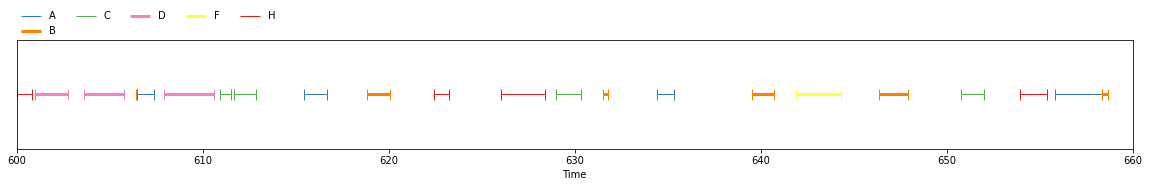

In [16]:
diarization2

No good; first 8 seconds are silence (ok), next 30 are theme music (not ok).

In [17]:
with open('/content/f3wKxcP7hYE.rttm', 'w') as f2:
    diarization2.write_rttm(f2)

In [19]:
import torch
torch.cuda.empty_cache()

In [4]:
import torch

model = torch.hub.load('harritaylor/torchvggish', 'vggish')
model.eval()

model.forward('/content/f3wKxcP7hYE.wav')

Downloading: "https://github.com/harritaylor/torchvggish/archive/master.zip" to /root/.cache/torch/hub/master.zip
Downloading: "https://github.com/harritaylor/torchvggish/releases/download/v0.1/vggish-10086976.pth" to /root/.cache/torch/hub/checkpoints/vggish-10086976.pth


  0%|          | 0.00/275M [00:00<?, ?B/s]

Downloading: "https://github.com/harritaylor/torchvggish/releases/download/v0.1/vggish_pca_params-970ea276.pth" to /root/.cache/torch/hub/checkpoints/vggish_pca_params-970ea276.pth


  0%|          | 0.00/177k [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


tensor([[175.,   8., 147.,  ..., 148.,  69., 255.],
        [175.,   8., 147.,  ..., 148.,  69., 255.],
        [175.,   8., 147.,  ..., 148.,  69., 255.],
        ...,
        [172.,  23., 189.,  ..., 141.,   0., 255.],
        [173.,  13., 167.,  ...,   0., 198., 255.],
        [172.,   6., 160.,  ...,   0., 217., 255.]], device='cuda:0',
       grad_fn=<SqueezeBackward0>)